## Earthquake Project: 2000 - 2023


### Content

For this project, a secondary data provided by the USGS is used to investigate on the earthquake events around the world for the last 13 years. The current dataset covered an earthquake records from all over the world with a latitudes coverage between -180 to 180 and longitudes between -70 to 85. The search time filter was set to dates between 2000-01-30 and 2023-02-14. According the source,  majority of the recording stations/ magnitude locations were placed in US and Alaska. In this project, the magnitudes with values greater that 5,  or with a Moderate effect(according to Richter's scaling) is considered.

#### Features

-  gap: Seismic Gap. Region along an active fault where stress is accumulating because no earthquakes have occurred there recently. Seismic gaps are often flanked by areas that have experienced earthquakes in the near past.
- Nst - Number of seismic stations which reported P- and S-arrival times for this earthquake. 
- Dmin -  Horizontal distance from the epicenter to the nearest station (in km). In general, the smaller this number, the more reliable is the calculated depth of the earthquake. 
- Rmss -. The root-mean-square (RMS) travel time residual, in sec, using all weights.

- #### Richter magnitude scale
     The Richter magnitude of an earthquake is determined from the logarithm of the amplitude of waves recorded by seismographs (adjustments are included to compensate for the variation in the distance between the various seismographs and the epicenter of the earthquake). The original formula is:

     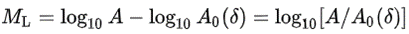

    where A is the maximum excursion of the Wood–Anderson seismograph, the empirical function A0 depends only on the epicentral distance of the station, delta.  In practice, readings from all observing stations are averaged after adjustment with station-specific corrections to obtain the ML value.
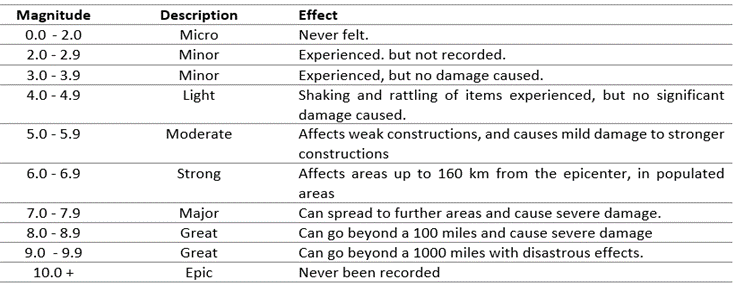

- #### Magnitude type description:
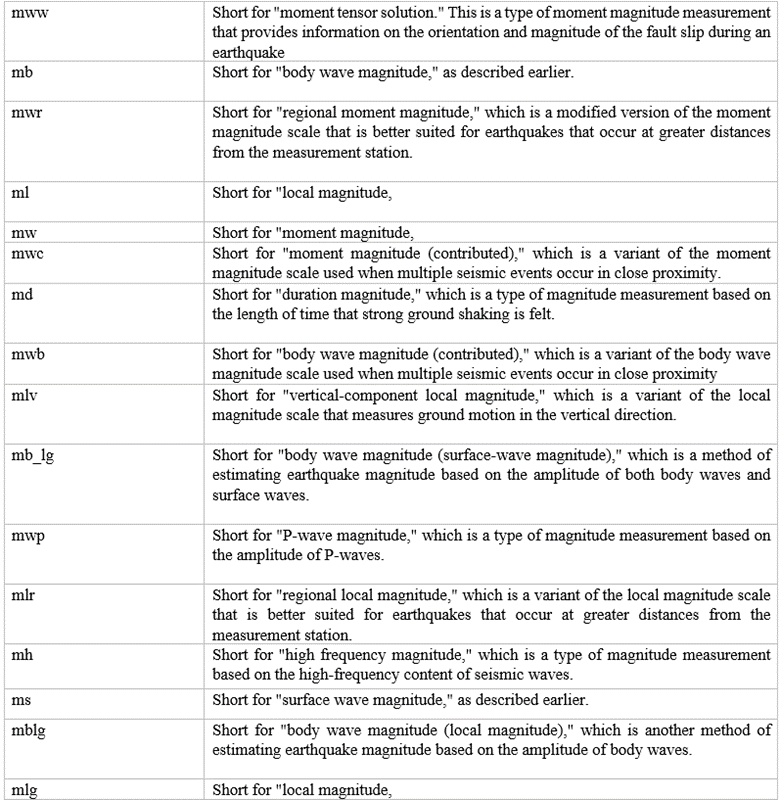

***

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
from datetime import datetime as dt
from datetime import timedelta as td
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer 
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

In [2]:
## get the general and the numeric data 
#path = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2000-01-01%2000:00:00&endtime=2023-02-15%2000:00:00&minmagnitude=2.5&orderby=time&producttype=losspager'
#dataset = pd.read_csv(path, parse_dates = ['time']) ## parse date is more like datetime so you can use dt to get the data

In [3]:
### datasets
df = pd.read_csv('Earthquake_20-23.csv', parse_dates = ['time'])
num_df = df.select_dtypes(['float32', 'float64', 'int32', 'int64', 'uint8'])
df_tec = pd.read_csv('all.csv')

### Exploratory Data analysis (EDA)

In [4]:
## get the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             8062 non-null   datetime64[ns, UTC]
 1   latitude         8062 non-null   float64            
 2   longitude        8062 non-null   float64            
 3   depth            8062 non-null   float64            
 4   mag              8062 non-null   float64            
 5   magType          8062 non-null   object             
 6   nst              1939 non-null   float64            
 7   gap              7226 non-null   float64            
 8   dmin             6640 non-null   float64            
 9   rms              8039 non-null   float64            
 10  net              8062 non-null   object             
 11  id               8062 non-null   object             
 12  updated          8062 non-null   object             
 13  place            8

In [5]:
## check the summary of the dataframe
print("Dataframe summary: \n")
df.describe()

Dataframe summary: 



,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8062.000000,8062.000000,8062.000000,8062.000000,1939.000000,7226.000000,6640.000000,8039.000000,6239.000000,7853.000000,5027.000000,5476.000000
mean,9.340407,-14.252826,49.247926,5.344812,114.400206,55.562573,3.610462,0.771598,5.997293,2.495506,0.080577,44.340394
std,34.385810,128.161758,107.410132,0.801304,129.197722,49.528700,5.118476,0.320663,3.204755,3.636561,0.082181,65.642515
min,-69.773900,-179.977600,-1.920000,2.520000,0.000000,7.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000
25%,-17.904300,-123.951208,10.000000,4.900000,31.000000,26.000000,0.667750,0.620000,4.100000,1.700000,0.048000,15.000000
50%,11.187400,-66.947550,11.400000,5.500000,69.000000,40.000000,1.905000,0.800000,6.600000,1.800000,0.061000,27.000000
75%,37.056475,126.874875,35.000000,5.800000,136.000000,64.000000,4.441500,0.980000,8.130000,2.700000,0.080000,46.000000
max,85.729000,179.998100,670.810000,8.600000,770.000000,328.000000,39.934000,2.100000,15.800000,37.240000,1.642000,941.000000


In [6]:
print("Numberical_variables deviation:\n")
num_df.std()

Numberical_variables deviation:



latitude            34.385810
longitude          128.161758
depth              107.410132
mag                  0.801304
nst                129.197722
gap                 49.528700
dmin                 5.118476
rms                  0.320663
horizontalError      3.204755
depthError           3.636561
magError             0.082181
magNst              65.642515
dtype: float64

In [7]:
print("SHAPE: ", df.shape)
print("SIZE: ", df.size)

SHAPE:  (8062, 22)
SIZE:  177364


In [8]:
### Check null values
print("DataFrame NaN amount :\n")
df.isnull().sum()

DataFrame NaN amount :



time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                6123
gap                 836
dmin               1422
rms                  23
net                   0
id                    0
updated               0
place                56
type                  0
horizontalError    1823
depthError          209
magError           3035
magNst             2586
status                0
locationSource        0
magSource             0
dtype: int64

In [9]:
### check the duplicated values
print("Number of replicated observations :\n")
df.duplicated().sum()

Number of replicated observations :



0

In [10]:
print("Columns:\n")
df.columns

Columns:



Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [11]:
### getting my working columns
df = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'magType','place', 'magSource' ]]
print("Columns needed :\n")
df.columns.tolist()

Columns needed :



['time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'place',
 'magSource']

In [12]:
### Check null values_ needecols
print("Columns NaN amount :\n")
df.isnull().sum()

Columns NaN amount :



time          0
latitude      0
longitude     0
depth         0
mag           0
magType       0
place        56
magSource     0
dtype: int64

In [13]:
print('Drop nan from the place column:\n')
df = df.dropna()
df['place'].isnull().sum()

Drop nan from the place column:



0

### Data transformation
- #### Create New Feature

In [14]:
### Extract the countries
df['place'].value_counts().head()

South Sandwich Islands region       202
Kermadec Islands region             147
Pacific-Antarctic Ridge              81
Kermadec Islands, New Zealand        80
southeast of the Loyalty Islands     75
Name: place, dtype: int64

In [15]:
print("Extracting the countries from the place column :\n")
df['country'] = df['place'].str.split(',', expand = True, n =1)[1].str.strip()
df['country'].head()

Extracting the countries from the place column :



0        Romania
1        Vanuatu
2    New Zealand
3           None
4    Philippines
Name: country, dtype: object

In [16]:
### replacing the US states to USA as a country
df = df.set_index('country')
df = df.rename(index = {'California': 'USA', 'Arizona':'USA', 'South Carolina':'USA', 'Georgia':'USA', 
                        'Nevada':'USA','CA':'Canada', 'New Mexico':'USA', 'Tennessee':'USA', 'Oklahoma':'USA', 
                        'Kansas':'USA', 'South Carolina':'USA', 'Washington':'USA', 'Idaho':'USA', 'North Carolina':'USA',
                        'Colorado':'USA','Louisiana':'USA', 'Delaware':'USA', 'Michigan':'USA', 'Virginia':'USA', 
                        'Illinois':'USA', 'Oregon':'USA', 'Utah':'USA', 'B.C., MX':'Mexico', 'Texas':'USA',
                        'Wyoming':'USA', 'Massachusetts':'USA', 'New Jersey':'USA', 'Ohio':'USA', 'Maryland':'USA', 
                        'Nunavut, Canada':'Canada', None:np.nan, 'Hawaii':'USA', 'Alaska':'USA'
                       })
df= df.reset_index()
df['country'] = df['country'].str.strip()

In [17]:
def richter(x):
    intensity_map = {
        0 <= x < 2: 'Micro',
        2 <= x < 3: 'Minor',
        3 <= x < 4: 'Minor',
        4 <= x < 5: 'Light',
        5 <= x < 6: 'Moderate',
        6 <= x < 7: 'Strong',
        7 <= x < 8: 'Major',
        8 <= x < 9: 'Great',
        9 <= x < 10: 'Great'
    }
    return intensity_map.get(True, 'Unknown')
df['risk'] = df['mag'].apply(lambda x: richter(x))

In [18]:
### describing the magType 
df['magType'] = df['magType'].str.strip()
def magType(abbr):
    magtype_map = {
        'md': 'Duration',
        'ml': 'Local',
        'Ml':'Local',
        'mlv': 'Local',
        'mlr': 'Local',
        'mlg': 'Local',
        'mb': 'body wave',
        'mblg': 'body wave',
        'mwb': 'body wave',
        'mb_lg': 'body wave',
        'mwp': 'P-wave',
        'mh': 'High freq',
        'ms': 'Surface wave',
        'mw': 'Moment',
        'mwc': 'Moment',
        'mww': 'Moment',
        'mwr': 'Moment'
    }
    return magtype_map.get(abbr, 'Unknown')
df['mag_type'] = df['magType'].apply(lambda x: magType(x))

#### Checking the correlation between attributes

In [19]:
### generate a new dataframe
enco_data = df.copy()
enco_data = enco_data.drop(columns = ['time','magType', 'magSource', 'place'])

In [20]:
### Transform the Non_num attributes
label_enco = LabelEncoder() ## get the object
 
### Transform the data
enco_data['country'] = label_enco.fit_transform(enco_data['country'])
enco_data['risk'] = label_enco.fit_transform(enco_data['risk'])

enco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8006 entries, 0 to 8005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    8006 non-null   int32  
 1   latitude   8006 non-null   float64
 2   longitude  8006 non-null   float64
 3   depth      8006 non-null   float64
 4   mag        8006 non-null   float64
 5   risk       8006 non-null   int32  
 6   mag_type   8006 non-null   object 
dtypes: float64(4), int32(2), object(1)
memory usage: 375.4+ KB


<AxesSubplot:>

<Figure size 500x500 with 0 Axes>

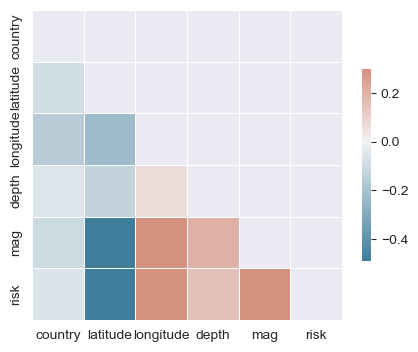

In [169]:
### check the correlation between attributes
corr = enco_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # helps get the Main Diagonal elements

# Set up the matplotlib figure
fig = plt.figure(figsize = (5,5))
fig, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
## check different correlation methods
Corr_Pearson = enco_data.corr(method="pearson")
Corr_Spearman = enco_data.corr(method="spearman")
Cov_Result = enco_data.cov()

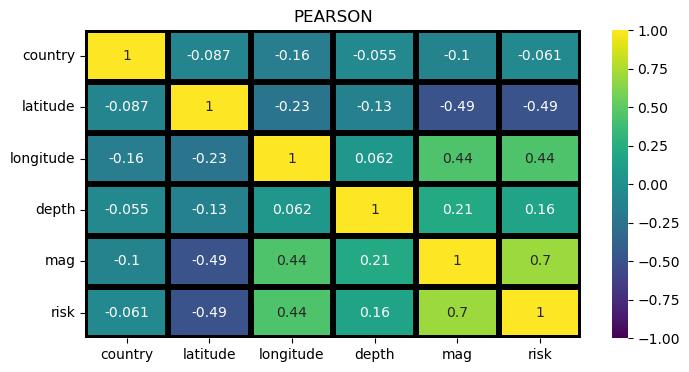

In [22]:
figure = plt.figure(figsize=(8,4))
plt.title("PEARSON")
sns.heatmap(Corr_Pearson,annot=True,vmin=-1,center=0,vmax=1,linewidths=3,linecolor="black",cmap="viridis")
plt.show()

- Pearson correlation is a measure of the linear relationship between two variables. It is often used to investigate whether there is a correlation between two sets of data, and if so, how strong that correlation is. From the findings,  we can see that there is a poor correlation between the depth and magnitude,  and strong correlation between magnitude and risk/damage. 

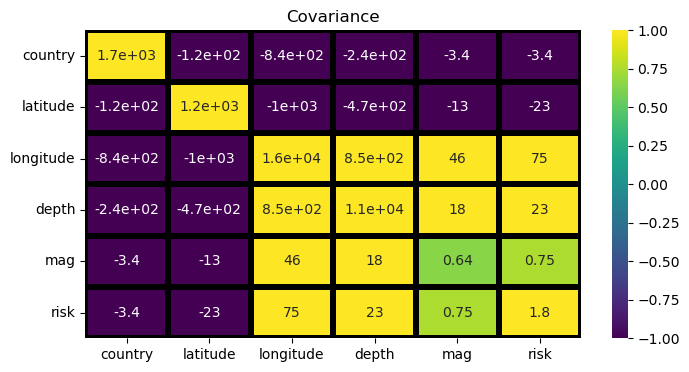

In [23]:
figure = plt.figure(figsize=(8,4))
plt.title("Covariance")
sns.heatmap(Cov_Result, annot=True, vmin=-1, center=0, vmax=1, linewidths=3, linecolor="black", cmap="viridis")
plt.show()

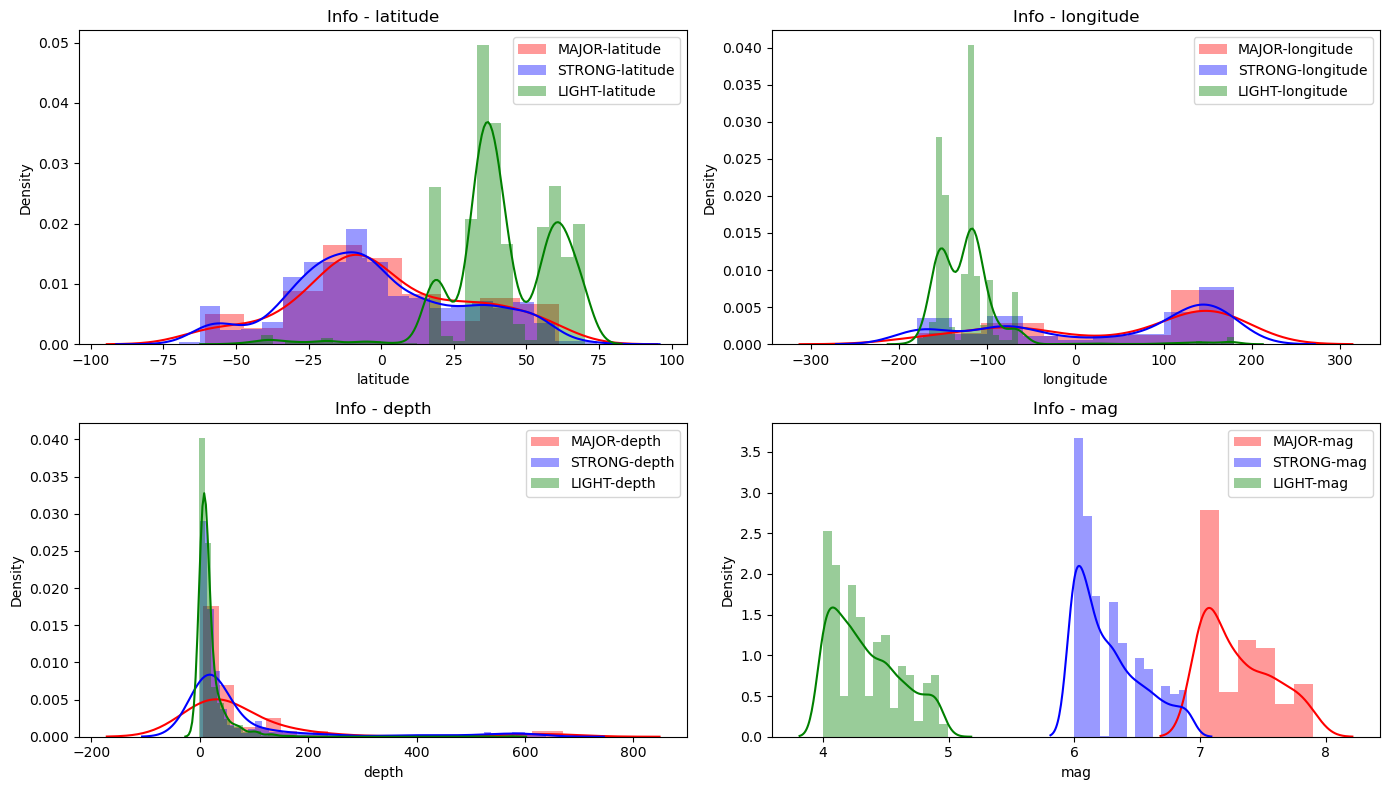

In [24]:
### exploring the distribution of the attributes 

### get out concerned columns
dff = df[['latitude', 'longitude', 'depth', 'mag', 'risk']]

figure = plt.figure(figsize=(14,8))
for axis,indexing in enumerate(dff.columns[:-1]):
    
    plt.subplot(2,2,axis+1)
    plt.title(f"Info - {indexing}")
    
    sns.distplot(dff[dff['risk'] == "Major"][indexing], color='red',label=f'MAJOR-{indexing}')
    sns.distplot(dff[dff['risk'] == "Strong"][indexing], color='blue',label=f'STRONG-{indexing}')
    sns.distplot(dff[dff['risk'] == "Light"][indexing], color='green',label=f'LIGHT-{indexing}')

    plt.legend()
    
plt.tight_layout()
plt.show()

Based on the first latitude graph, it is apparent that for major and strong Richter events, the distribution is relatively normal with heavy tails. On the other hand, for light events, the distribution is not normally distributed. The depth graph indicates that the majority of incidents occurred within a similar range, but there were some outliers in the case of major and strong events.

## Questions:

### Q.  What is the historical pattern of earthquake activity in a specific region? 
- This question requires analyzing earthquake data over a specific time period and identifying any patterns or trends.

In [28]:
### Top
df['country'].value_counts().head(5) 

USA                 1690
Indonesia            512
Canada               424
Papua New Guinea     368
Chile                272
Name: country, dtype: int64

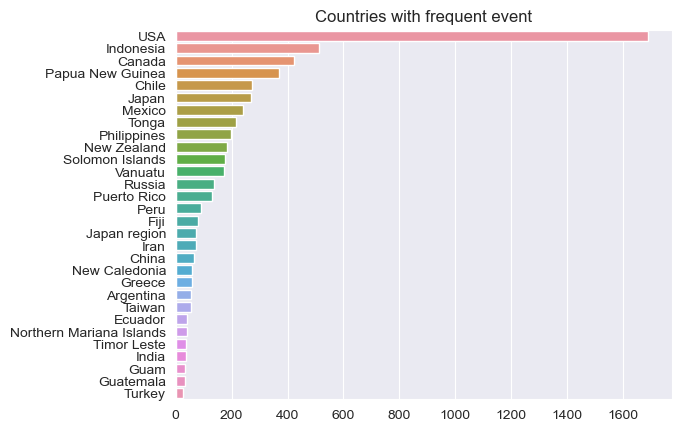

In [26]:
count = df['country'].value_counts().head(30)
sns.set_style('darkgrid')
sns.barplot(y = count.index, x = count.values)
plt.title('Countries with frequent event');

***

### working on the rows with region name

In [35]:
## get the dataframe_ for the regions that are assigned as non
region = df[~df['place'].str.contains(',')]
region = region.reset_index()
region = region[['index','place']]
region = region.set_index('index')

In [45]:
import country_converter as coco
standard_names = coco.convert(names=region['place'], to ='name_short')
print(standard_names)
converted = pd.DataFrame(standard_names, index = region.index, columns = ['converted'])

Tristan da Cunha region not found in regex
Carlsberg Ridge not found in regex
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then one regular expression match for Turkey-Syria border region
More then on

More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression match for Eritrea - Ethiopia region
More then one regular expression m

More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match for Afghanistan-Tajikistan border region
More then one regular expression match f

More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Ar

More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Argentina border region
More then one regular expression match for Chile-Ar

More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regula

southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of the Loyalty Islands not found in regex
southeast of

central Mid-Atlantic Ridge not found in regex
central East Pacific Rise not found in regex
central East Pacific Rise not found in regex
central Mid-Atlantic Ridge not found in regex
Banda Sea not found in regex
central Mid-Atlantic Ridge not found in regex
southeast of the Loyalty Islands not found in regex
Easter Island region not found in regex
central Mid-Atlantic Ridge not found in regex
Tristan da Cunha region not found in regex
Pacific-Antarctic Ridge not found in regex
Chagos Archipelago region not found in regex
central Mid-Atlantic Ridge not found in regex
Easter Island region not found in regex
Kermadec Islands region not found in regex
southern East Pacific Rise not found in regex
Ascension Island region not found in regex
southern Mid-Atlantic Ridge not found in regex
Easter Island region not found in regex
Prince Edward Islands region not found in regex
central Mid-Atlantic Ridge not found in regex
Prince Edward Islands region not found in regex
Easter Island region not fo

North Atlantic Ocean not found in regex
southern East Pacific Rise not found in regex
central East Pacific Rise not found in regex
North Atlantic Ocean not found in regex
southern Mid-Atlantic Ridge not found in regex
southern Mid-Atlantic Ridge not found in regex
central East Pacific Rise not found in regex
Drake Passage not found in regex
Drake Passage not found in regex
Drake Passage not found in regex
southern East Pacific Rise not found in regex
northern Alaska not found in regex
southern Mid-Atlantic Ridge not found in regex
central Mid-Atlantic Ridge not found in regex
west of Macquarie Island not found in regex
Pacific-Antarctic Ridge not found in regex
Kermadec Islands region not found in regex
Pacific-Antarctic Ridge not found in regex
central Mid-Atlantic Ridge not found in regex
Ascension Island region not found in regex
Indian Ocean Triple Junction not found in regex
Indian Ocean Triple Junction not found in regex
Indian Ocean Triple Junction not found in regex
southern Ea

More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
More then one regular expression match for Mauritius - Reunion region
Pacific-Antarctic Ridge not found in regex
southeast of Easter Island not found in regex
southeast of the Loyalty Islands not found in regex
Kermadec Islands region not found in regex
Kermadec Islands region not found in regex
northern Mid-Atlantic Ridge not found in regex
Kermadec Islands region no

southeast of the Loyalty Islands not found in regex
southern East Pacific Rise not found in regex
southern East Pacific Rise not found in regex
Kermadec Islands region not found in regex
southeast of the Loyalty Islands not found in regex
South Indian Ocean not found in regex
South Indian Ocean not found in regex
central Mid-Atlantic Ridge not found in regex
central Mid-Atlantic Ridge not found in regex
northern Mid-Atlantic Ridge not found in regex
Kermadec Islands region not found in regex
Kermadec Islands region not found in regex
Kermadec Islands region not found in regex
Kermadec Islands region not found in regex
Kermadec Islands region not found in regex
southeast of Easter Island not found in regex
Pacific-Antarctic Ridge not found in regex
Reykjanes Ridge not found in regex
Scotia Sea not found in regex
northern Mid-Atlantic Ridge not found in regex
Balleny Islands region not found in regex
central East Pacific Rise not found in regex
Banda Sea not found in regex
Kuril Islands 

South Atlantic Ocean not found in regex
South Atlantic Ocean not found in regex
Pacific-Antarctic Ridge not found in regex
Ascension Island region not found in regex
Scotia Sea not found in regex
Scotia Sea not found in regex
Scotia Sea not found in regex
Scotia Sea not found in regex
off the west coast of northern Sumatra not found in regex
Scotia Sea not found in regex
Scotia Sea not found in regex
Scotia Sea not found in regex
Pacific-Antarctic Ridge not found in regex
Kermadec Islands region not found in regex
Carlsberg Ridge not found in regex
southeast of the Loyalty Islands not found in regex
Easter Island region not found in regex
Balleny Islands region not found in regex
west of Macquarie Island not found in regex
Owen Fracture Zone region not found in regex
Sea of Okhotsk not found in regex
northern Mid-Atlantic Ridge not found in regex
southern East Pacific Rise not found in regex
southern East Pacific Rise not found in regex
Carlsberg Ridge not found in regex
south of the K

['not found', 'not found', 'South Georgia and South Sandwich Is.', 'Honduras', 'Türkiye', 'Türkiye', 'Türkiye', 'Türkiye', ['Syria', 'Türkiye'], 'Türkiye', 'New Zealand', 'not found', 'not found', 'not found', 'not found', 'Vanuatu', 'Fiji', 'not found', 'Tonga', 'Vanuatu', 'Vanuatu', 'Fiji', 'South Georgia and South Sandwich Is.', 'not found', 'South Georgia and South Sandwich Is.', 'not found', 'New Zealand', 'not found', 'not found', 'not found', 'not found', 'Tonga', ['Eritrea', 'Ethiopia'], 'Fiji', 'not found', 'not found', 'not found', 'not found', 'not found', 'Panama', 'South Georgia and South Sandwich Is.', 'not found', 'not found', 'Samoa', 'Solomon Islands', 'not found', 'not found', 'Samoa', 'Bouvet Island', 'not found', 'Iran', 'not found', 'not found', 'not found', 'not found', 'Solomon Islands', 'not found', 'South Georgia and South Sandwich Is.', 'Solomon Islands', 'Solomon Islands', 'not found', 'South Africa', 'not found', 'Fiji', 'Fiji', 'Fiji', 'Italy', 'Nepal', ['A

In [54]:
df_regions = pd.merge(region, converted, left_index = True, right_index = True)

In [65]:
df_regions.head()

,place,converted
index,,
3,Tristan da Cunha region,not found
5,Carlsberg Ridge,not found
7,South Sandwich Islands region,South Georgia and South Sandwich Is.
8,north of Honduras,Honduras
9,Central Turkey,Türkiye


In [66]:
n = df_regions[df_regions['converted'] != 'not found']

In [77]:
countries_filt = n['converted'].str.split(' ', expand = True)[0]

In [102]:
df_trial = df.copy()
df_trial = df_trial.rename_axis('id')
countries_filt = countries_filt.rename_axis('id')

In [105]:
nnn = pd.merge(df_trial , countries_filt, how = 'left', on = 'id')

In [110]:
nnn = nnn.rename(columns = {0:'converted'})
nnn['converted'].unique()

array([nan, 'South', 'Honduras', 'Türkiye', 'New', 'Vanuatu', 'Fiji',
       'Tonga', 'Panama', 'Samoa', 'Solomon', 'Bouvet', 'Iran', 'Italy',
       'Nepal', 'El', 'India', 'Northern', 'Taiwan', 'Ecuador',
       'Svalbard', 'Gibraltar', 'Nicaragua', 'Greenland', 'Micronesia,',
       'Chile', 'Tajikistan', 'Australia', 'Puerto', 'Jamaica', 'Guam',
       'Mexico', 'Falkland'], dtype=object)

In [112]:
nnn.head(20)

,country,time,latitude,longitude,depth,mag,magType,place,magSource,risk,mag_type,converted
id,,,,,,,,,,,,
0,Romania,2023-02-14 13:16:50.833000+00:00,45.1058,23.2068,10.000,5.6,mww,"0 km NE of Lele?ti, Romania",us,Moderate,Moment,NaN
1,Vanuatu,2023-02-14 02:03:16.344000+00:00,-15.3437,167.5470,119.615,5.2,mww,"45 km ENE of Luganville, Vanuatu",us,Moderate,Moment,NaN
2,New Zealand,2023-02-13 09:18:07.995000+00:00,-29.5218,-177.9727,374.033,6.1,mww,"Kermadec Islands, New Zealand",us,Strong,Moment,NaN
3,NaN,2023-02-11 15:31:26.464000+00:00,-35.3341,-15.6399,10.000,5.6,mww,Tristan da Cunha region,us,Moderate,Moment,NaN
4,Philippines,2023-02-11 08:55:04.748000+00:00,3.6086,126.7339,22.941,5.9,mww,"243 km SE of Sarangani, Philippines",us,Moderate,Moment,NaN
5,NaN,2023-02-09 21:12:19.560000+00:00,-1.2822,67.5657,10.000,5.5,mww,Carlsberg Ridge,us,Moderate,Moment,NaN
6,Solomon Islands,2023-02-09 10:53:17.268000+00:00,-10.7636,161.6440,35.000,5.5,mww,"45 km SW of Kirakira, Solomon Islands",us,Moderate,Moment,NaN
7,NaN,2023-02-09 09:09:16.777000+00:00,-55.7305,-27.2107,35.000,5.4,mww,South Sandwich Islands region,us,Moderate,Moment,South
8,NaN,2023-02-08 15:16:16.980000+00:00,16.7334,-86.0574,10.000,5.5,mww,north of Honduras,us,Moderate,Moment,Honduras


***

### Q. How many seismic events take place each year? In which of the last 20 years did we have the greatest number of such events?

In [352]:
df['time'].dt.year.value_counts().head()

2021    1023
2020     931
2019     848
2018     833
2014     756
Name: time, dtype: int64

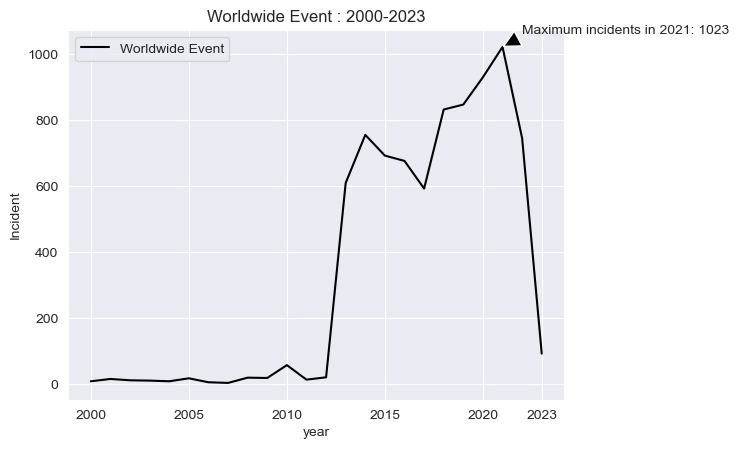

In [353]:
year = df['time'].dt.year.value_counts()
sns.lineplot(x = year.index, y = year.values, color = 'k', label = 'Worldwide Event' )
plt.xlabel('year')
plt.ylabel('Incident')
plt.title('Worldwide Event : 2000-2023')
plt.xticks([2000, 2005, 2010, 2015, 2020, 2023])

### adding the text
ax_year = year.idxmax()
max_count = year.max()
max_year = 2021
max_count = 1023

plt.annotate(f'Maximum incidents in {max_year}: {max_count}',
             xy=(max_year, max_count),
             xytext=(max_year+1, max_count+50),
             ha='left',
             va='center',
             arrowprops=dict(facecolor='black', shrink=0.05));

- Based on the findings, it can be observed that the frequency of seismic events has been on the rise globally over the years, with a sharp increase occurring around the year 2015. The maximum number of seismic events was recorded in the year 2021, with approximately 1023 events reported. 

### Q. What are common magnitudes?  Looking only at the integer portion of the magnitudes, how often does each value occur?

## add range map

In [357]:
### Integrate portion of magnitudes|
round(df['mag'].value_counts(normalize=True),2)

5.50    0.12
5.60    0.09
5.40    0.08
5.70    0.07
5.80    0.06
        ... 
2.87    0.00
3.65    0.00
5.73    0.00
3.11    0.00
5.97    0.00
Name: mag, Length: 241, dtype: float64

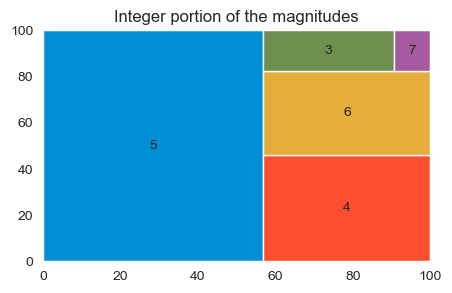

In [89]:
import squarify ## for treemaps
d = df['mag'].astype(int).value_counts(normalize=True).head() 
fig = plt.figure(figsize = (5,3))
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#a85aa1']
squarify.plot(d, label = d.index, color=colors)

# Add a title to the plot
plt.title("Integer portion of the magnitudes", fontsize=12)

# Show the plot
plt.show()

- From the above graph we can observed that events with magnitudes 4 and 5 have similar proportions of occurrence, accounting for approximately 38.4% and 38.1% of the total events, respectively. Events with magnitude 3 are the next most frequent, accounting for around 13% of the total events.

In [358]:
### Check over all the risk worldwide
risk_count = df['risk'].value_counts()
risk_count

Moderate    4538
Light       1594
Strong      1239
Minor        489
Major        134
Great         12
Name: risk, dtype: int64

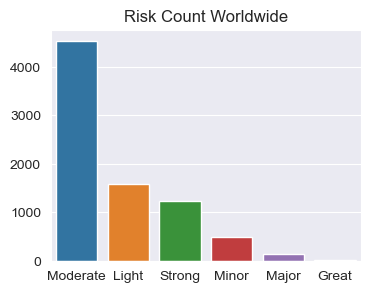

In [360]:
fig = plt.figure(figsize = (4,3))
sns.barplot(x = risk_count.index, y = risk_count.values)
plt.title('Risk Count Worldwide');

- Based on the chart, it can be observed that the majority of earthquakes that occurred worldwide were of moderate magnitude (5.0 - 5.9) according to the Richter scale.

### Q. How do earthquake magnitudes and depths vary in a specific region? 
- This question requires analyzing earthquake data and identifying any patterns or trends in magnitudes and depths over a specific time period.

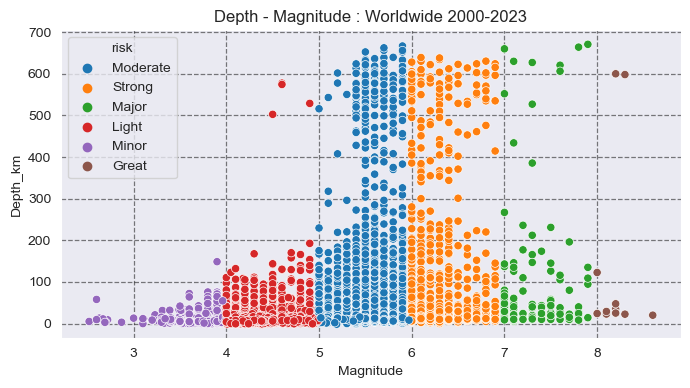

In [361]:
figure = plt.figure(figsize=(8,4))
sns.scatterplot(y=df["depth"],x=df["mag"] , hue = df['risk'])
plt.grid(True, which='both', axis='both', alpha=0.5, linestyle='--', linewidth=0.9, color = 'black')
plt.title("Depth - Magnitude : Worldwide 2000-2023")
plt.xlabel('Magnitude')
plt.ylabel('Depth_km')
plt.show()

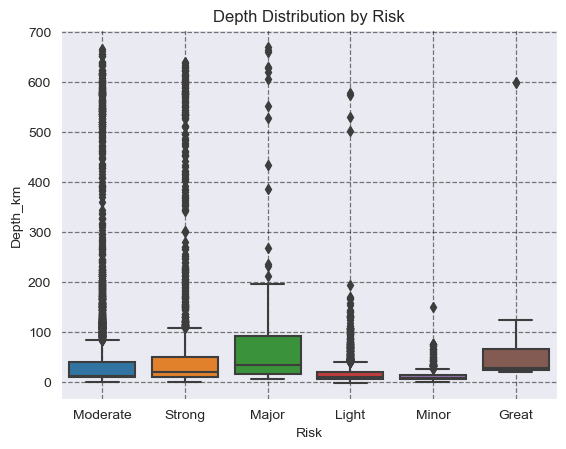

In [302]:
sns.boxplot(y=df["depth"], x=df["risk"])
plt.grid(True, which='both', axis='both', alpha=0.5, linestyle='--', linewidth=0.9, color = 'black')
plt.title("Depth Distribution by Risk")
plt.xlabel('Risk')
plt.ylabel('Depth_km')
plt.show()

- Based on the above charts, it can be observed that most seismic events occurred at relatively shallow depths, with an average depth of approximately 50 kilometers. These shallow earthquakes are considered to be more dangerous and destructive as they release their energy closer to the Earth's surface where people and infrastructure are located. In contrast, deep earthquakes that occur at depths greater than 70 kilometers are typically less destructive because their energy dissipates as it travels through the Earth's layers.

In [301]:
### checking the distribution of the depth data
df['depth'].describe()

count    8006.000000
mean       49.059816
std       106.957594
min        -1.920000
25%        10.000000
50%        11.400000
75%        35.000000
max       670.810000
Name: depth, dtype: float64

In [364]:
percentage = len(df[df['depth'] < 0])/len(df)*100
print(f'{percentage:.2f}% of the events occurred above the Earth\'s surface over the total.')


0.32% of the events occurred above the Earth's surface over the total.


- Negative depth values indicate that the event occurred above the Earth's surface, such as in the case of shallow earthquakes or explosions. 

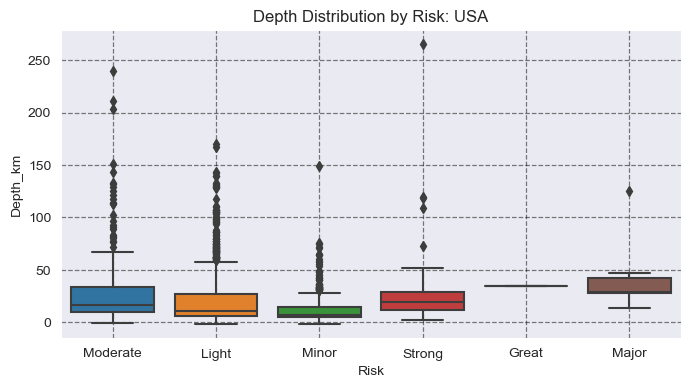

In [365]:
figure = plt.figure(figsize=(8,4))
usa_d = df[df['country'] == 'USA']
sns.boxplot(y=usa_d["depth"], x=usa_d['risk'])
plt.grid(True, which='both', axis='both', alpha=0.5, linestyle='--', linewidth=0.9, color = 'black')
plt.title("Depth Distribution by Risk: USA")
plt.xlabel('Risk')
plt.ylabel('Depth_km')
plt.show()

- It can be stated that the seismic events that occurred in the United States over the past 13 years were predominantly shallow, with depths ranging from approximately 0 to 10 kilometers.

### Q. How do earthquake magnitude types and depths vary in a specific region?

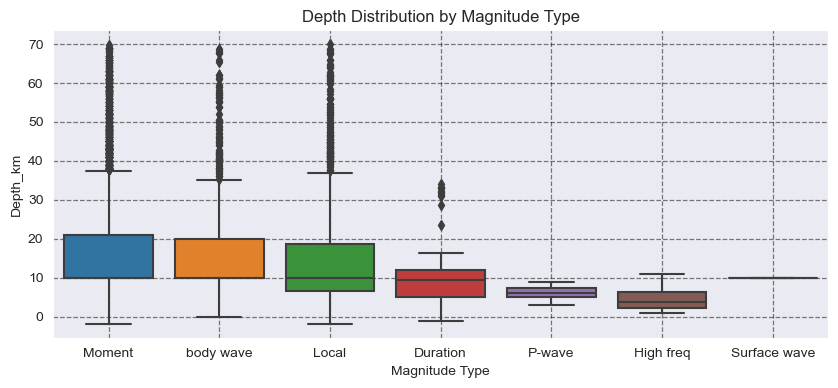

In [107]:
df_300 = df[df["depth"] < 70]
figure = plt.figure(figsize=(10,4))
sns.boxplot(y=df_300["depth"], x=df_300["mag_type"])
plt.grid(True, which='both', axis='both', alpha=0.5, linestyle='--', linewidth=0.9, color='black')
plt.title("Depth Distribution by Magnitude Type")
plt.xlabel('Magnitude Type')
plt.ylabel('Depth_km')
plt.show()

### Q. What is the relationship between seismic activity and tectonic plates in a specific region? 
- This question requires analyzing earthquake data and mapping it onto tectonic plate boundaries

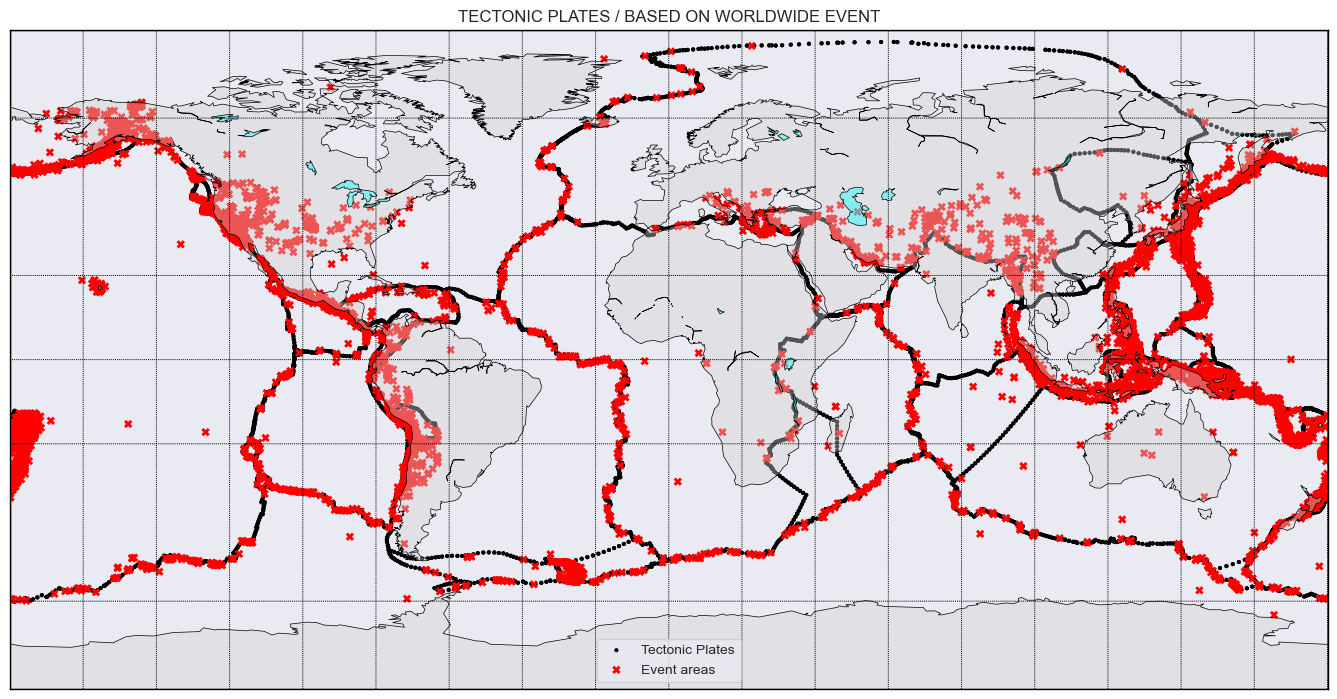

In [344]:
figure = plt.figure(figsize=(17,12))
Map_Plot = Basemap(projection="cyl",resolution='c')
Map_Plot.drawmapboundary()
Map_Plot.fillcontinents(color='lightgray', lake_color='aqua', alpha=0.4, zorder=1)
#Map_Plot.drawlsmask(ocean_color='aqua', land_color='lightgray', lakes=True, resolution='i')
Map_Plot.drawcoastlines(linewidth=0.5)
Map_Plot.drawmeridians(range(0, 360, 20),linewidth=0.7)
Map_Plot.drawparallels([-66,-23,0.0,23,66],linewidth=0.7)
lon,lat = Map_Plot(df_tec["lon"],df_tec["lat"])
Map_Plot.scatter(lon,lat,marker=".",color="k",edgecolor="None", label = 'Tectonic Plates')
lon1,lat1 = Map_Plot(df["longitude"],df["latitude"])
Map_Plot.scatter(lon1,lat1,marker="X",alpha=1,color="r",edgecolor="None", label = 'Event areas')
plt.legend()
plt.title("TECTONIC PLATES / BASED ON WORLDWIDE EVENT")
plt.show()



- Most of the world's seismic activity occurs along the boundaries between tectonic plates. The movement of these plates can cause stress to build up in the rocks along the plate boundary, which can eventually be released as an earthquake. This is why regions around tectonic plate boundaries, such as the Pacific Ring of Fire, are often associated with high levels of seismic activity. However, seismic events can also occur in regions that are far from plate boundaries, such as intraplate earthquakes that occur within the interior of a tectonic plate.
- As expected from this findings, it can be observed that a majority of the seismic events occurred in regions around tectonic plates.


## Exploring how the seismic effect in the Turkey region

### Q. Are earthquakes common in Turkey?

In [250]:
### split the turkish cities
turk_df = df[df['country'].str.contains('Turkey')]
def split_location_column(df, column_name, delimiter=' ', delimiter2 = ','):
    
    # Split the column based on the delimiter
    split_columns = df[column_name].str.split(delimiter, expand=True, n = 5)[4]
    split_columns = split_columns.str.split(delimiter2, expand=True, n = 5)[0].str.replace('?', '')
    
    # Add the split columns to the original dataframe and drop the original column
    d = pd.concat([turk_df, split_columns], axis=1)
    return d  

turk_df = split_location_column(turk_df, 'place', delimiter=' ')
turk_df = turk_df.rename(columns = {0 : 'City'})

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [181]:
## here we can see that the over all count of the incident
turk_m = turk_df['mag'].value_counts()
turk_m

5.4    4
5.7    1
5.8    1
7.5    1
5.5    1
7.8    1
6.1    1
Name: mag, dtype: int64

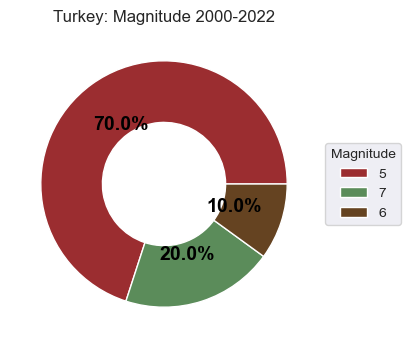

In [182]:
## plotting: what is the best option?
turk_mag = turk_df['mag'].astype(int).value_counts()
colors = ['#9b2d30', '#5b8c5a', '#654321', '#3c3c3c']
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(turk_mag , colors=colors, wedgeprops=dict(width=0.5), 
                                  autopct='%1.1f%%', textprops=dict(color="black"))
ax.legend(wedges, turk_mag.index,
          title="Magnitude",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=14, weight="bold")
ax.set_title("Turkey: Magnitude 2000-2022")
plt.show()


### list the range

In [183]:
## the count of incidence per city
m = turk_df[['City', 'mag']]
m.groupby('City').count().sort_values(by = 'mag', ascending = False).rename(columns = {'mag': 'count'})

,count
City,
Doanehir,2
Sincik,2
Düzce,1
Ekinözü,1
Gölba,1
Nurda,1
Tut,1
Yeilyurt,1


- From the finding we can see there were 10 events in the last 12 years in turkey. And 70% of that incident was with a magnitude of ~ 5 and 20% with a major damage

### Q. What is the relationship between seismic activity and tectonic plates in Turkey? 

In [184]:
### get the turkey data_ and extract according to the event damage
majo = turk_df[turk_df['risk'] == 'Major']
modo = turk_df[turk_df['risk'] == 'Moderate']
stro = turk_df[turk_df['risk'] == 'Strong']

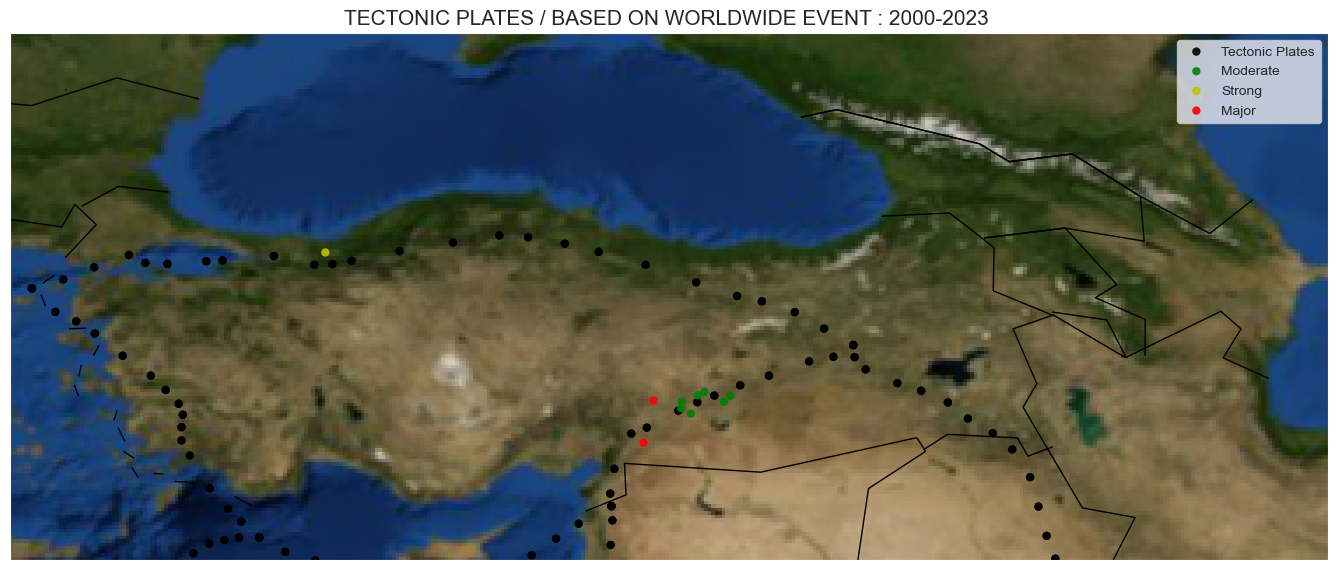

In [190]:
figure = plt.figure(figsize=(17,10))
Map_Plot = Basemap(projection='cyl',llcrnrlat=35,llcrnrlon=25,urcrnrlat=45,urcrnrlon=50, resolution='c')
Map_Plot.bluemarble()
Map_Plot.drawcountries(linewidth = 1)
lon,lat = Map_Plot(df_tec["lon"],df_tec["lat"])
Map_Plot.scatter(lon,lat,marker="o",color="k",edgecolor="None", alpha=0.9, label = 'Tectonic Plates')
Map_Plot.scatter(modo['longitude'],modo['latitude'],edgecolor='none', color='g',alpha=0.9, label = 'Moderate')
Map_Plot.scatter(stro['longitude'],stro['latitude'],edgecolor='none',color='y',alpha=0.9, label = 'Strong')
Map_Plot.scatter(majo['longitude'],majo['latitude'],edgecolor='none',color='r',alpha=0.9, label = 'Major')
plt.legend()
plt.title("TECTONIC PLATES / BASED ON WORLDWIDE EVENT : 2000-2023 ", fontsize=15)
plt.show()

- Map deplicts that majority of the incident was happened in the areas around the tectonic plates region

### Q. What is the impact of earthquakes on population in a specific region? 
- This question requires analyzing earthquake data and identifying areas that are most vulnerable to earthquakes based on population density and infrastructure.


In [204]:
## Get the population data for the cities: source from google
def cityPop(num):
    pop_map = {
            'Sincik': 4344, 
            'Yeilyurt': 1289,
            'Gölba': 109759,
            'Doanehir': np.nan,
            'Ekinözü':32072,
            'Tut':3388,
            'Nurda': 2808,
            'Düzce':384358
    }
    return pop_map.get(num, 'Unknown')
turk_df['population'] = turk_df['City'].apply(lambda x: cityPop(x))
turk_df.head(2)

,country,time,latitude,longitude,depth,mag,magType,place,magSource,risk,mag_type,City,population
7,Turkey,2023-02-07 10:18:13.368000+00:00,38.0026,38.5474,10.000,5.4,mww,"6 km WSW of Sincik, Turkey",us,Moderate,Moment,Sincik,4344.0
8,Turkey,2023-02-07 07:11:14.840000+00:00,38.1162,38.6693,6.829,5.4,mww,"10 km NNE of Sincik, Turkey",us,Moderate,Moment,Sincik,4344.0


In [206]:
## the count of incidence per city
m = turk_df[['City', 'risk','mag','population']].dropna()
print(m)

        City      risk  mag  population
7     Sincik  Moderate  5.4      4344.0
8     Sincik  Moderate  5.4      4344.0
10  Yeilyurt  Moderate  5.4      1289.0
11     Gölba  Moderate  5.4    109759.0
14   Ekinözü     Major  7.5     32072.0
15       Tut  Moderate  5.5      3388.0
16     Nurda     Major  7.8      2808.0
90     Düzce    Strong  6.1    384358.0


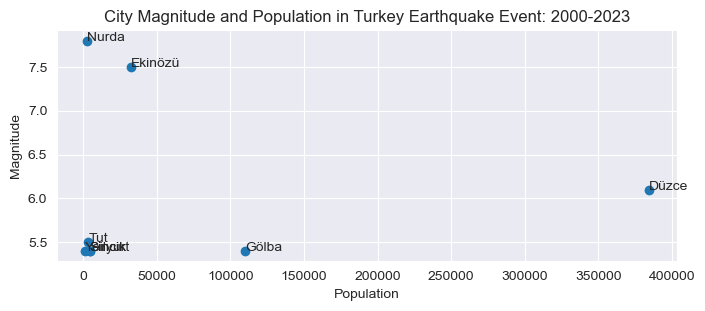

In [211]:
cities = m.City.to_list()
population = m.population.to_list()
mag = m.mag.to_list()

figure = plt.figure(figsize=(8,3))
plt.scatter(population, mag)
# Add labels and title
plt.xlabel('Population')
plt.ylabel('Magnitude')
plt.title('City Magnitude and Population in Turkey Earthquake Event: 2000-2023')

# Add annotations for each city
for i, city in enumerate(cities):
    plt.annotate(city, (population[i], mag[i]))

# Show the plot
plt.show()


### add offset


- The total popuation that can be affected needs detailed investigation on the area where the incident happened exactly! 
- But in general Nurda areas  might had the highest casualties as the risk to the population density was high.

### Q. How many seismic events took place in Turkey on February 6th? 


In [212]:
turk_df.set_index('time').loc['2023-02-06', 'City'] ## cities that had an event on 6th of february 2023

time
2023-02-06 15:33:32.721000+00:00    Yeilyurt
2023-02-06 15:14:34.398000+00:00       Gölba
2023-02-06 10:51:30.942000+00:00    Doanehir
2023-02-06 10:35:58.653000+00:00    Doanehir
2023-02-06 10:24:49.258000+00:00     Ekinözü
2023-02-06 02:03:36.258000+00:00         Tut
2023-02-06 01:17:34.362000+00:00       Nurda
Name: City, dtype: object

In [213]:
turk_df.set_index('time').loc['2023-02-06', 'mag']

time
2023-02-06 15:33:32.721000+00:00    5.4
2023-02-06 15:14:34.398000+00:00    5.4
2023-02-06 10:51:30.942000+00:00    5.7
2023-02-06 10:35:58.653000+00:00    5.8
2023-02-06 10:24:49.258000+00:00    7.5
2023-02-06 02:03:36.258000+00:00    5.5
2023-02-06 01:17:34.362000+00:00    7.8
Name: mag, dtype: float64

In [214]:
turk_df.set_index('time').loc['2023-02-06', 'mag'].shape[0]


7

- On 6th of February : there were 7 seismic events occured

### Q. What was their average magnitude? What was the mean magnitude?

In [215]:
turk_df.set_index('time').loc['2023-02-06', 'mag'].describe()

count    7.000000
mean     6.157143
std      1.034178
min      5.400000
25%      5.450000
50%      5.700000
75%      6.650000
max      7.800000
Name: mag, dtype: float64

-  With average magnitude of 6.15 

In [ ]:
len(turk_df)/len(df)*100 ## out of the total event that happenend worldwide 1.4% was in turkey!

In [63]:
feb = turk_df.set_index('time').loc['2023-02-06', 'mag']
all_y = turk_df.set_index('time').loc[:, 'mag']
Average_mean = len(feb)/len(all_y)
Average_mean 

0.7


### Further studies
- Can we predict earthquakes in a specific region? This question requires analyzing earthquake data and identifying any potential precursors to earthquake activity, such as changes in ground elevation or electromagnetic signals.

- What is the likelihood of a major earthquake occurring in a specific region in the near future? This question requires analyzing earthquake data and using statistical models to estimate the probability of a major earthquake occurring over a specific time period.

- How can we mitigate the impact of earthquakes on infrastructure and population in a specific region? This question requires analyzing earthquake data and identifying strategies for reducing the impact of earthquakes, such as building earthquake-resistant structures or establishing early warning systems.